## Project Objective

The objective of this project is to analyze customer financial and credit-related data to identify factors influencing loan default and build a model to predict loan default risk. This helps financial institutions make informed lending decisions and manage credit risk effectively.


## Importing Required Libraries

In this step, the required Python libraries for data manipulation, visualization are imported.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Understanding the Dataset

The Credit Risk dataset is loaded and an initial inspection is performed to understand its structure, features, and target variable.


In [ ]:
df=pd.read_csv('/content/credit_risk_dataset.csv')

In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
df.shape

(32581, 12)

In [ ]:
df.nunique()

,0
person_age,58
person_income,4295
person_home_ownership,4
person_emp_length,36
loan_intent,6
loan_grade,7
loan_amnt,753
loan_int_rate,348
loan_status,2
loan_percent_income,77


## Checking Data Types and Summary Statistics

Data types and summary statistics are reviewed to understand feature ranges, distributions, and potential anomalies.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Handling Missing Values

Missing values are identified and handled appropriately to ensure data quality and model reliability.



In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [ ]:
df.isnull().mean()

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,0.027470
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,0.095639
loan_status,0.000000
loan_percent_income,0.000000


## Handling Duplicate Records

The dataset is checked for duplicate entries to prevent biased analysis and model training.


In [ ]:
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.reset_index(drop=True,inplace=True)

## Exploratory Data Analysis (EDA)

EDA is performed to understand data distributions, detect outliers, and analyze relationships between features and loan default status.


## Detecting Outliers
Extreme values are identified to assess their impact on the dataset.

In [ ]:
def outlier(dataset,columns):
  outlier_summary=[]
  for col in columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    outlier=df[(df[col]<((q1)-1.5*(iqr))) | (df[col] > ((q3)+1.5*(iqr)))]
    outlier_summary.append(outlier)
  return outlier_summary


In [ ]:
pd.concat(outlier(df,df.select_dtypes(include='number').columns))

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
28962,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32411,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32412,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32413,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32414,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## Handling Outliers
Outliers are treated to improve model stability and performance.

In [ ]:
def handle_outlier(df,columns):
  for col in columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-(1.5)*iqr
    upper=q3+(1.5)*iqr
    df[col]=np.clip(df[col],lower,upper)
  return df


In [ ]:
#df=handle_outlier(df,col_names)

Alternate way to handle outliers is by using logs


In [ ]:
def handle_outlier_log(df,columns):
  for col in columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.74)
    iqr=q3-q1
    lower=q1-(1.5)*iqr
    upper=q3+(1.5)*iqr
    df[col]=np.log1p(df[col])
  return df


In [ ]:
#handle_outlier_log(df,col_names)

Note: Outliers are retained since they may contain meaningful information about loan risk.


##Checking for Correlation

Correlation analysis helps identify strongly related features. Highly correlated variables can be reduced to avoid redundancy and improve model performance.


Correlation Heatmap

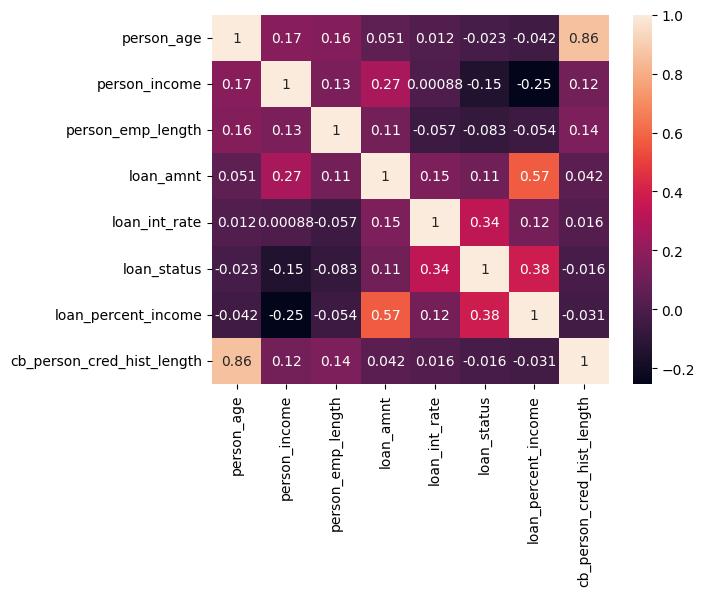

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
plt.show()

In [ ]:
def correlation(threshold,dataframe):
  col_name=set()
  corr=dataframe.corr()
  for i in range(len(corr.columns)):
    for j in range(i):
      if corr.iloc[i,j]>threshold:
        col=corr.columns[i]
        col_name.add(col)

  return col_name

In [ ]:
df.select_dtypes(include='number').corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173293,0.163001,0.050680,0.011760,-0.022698,-0.042300,0.859215
person_income,0.173293,1.000000,0.133903,0.265947,0.000878,-0.145005,-0.254472,0.117614
person_emp_length,0.163001,0.133903,1.000000,0.113183,-0.056607,-0.082817,-0.053999,0.144889
loan_amnt,0.050680,0.265947,0.113183,1.000000,0.146937,0.105736,0.572824,0.041865
loan_int_rate,0.011760,0.000878,-0.056607,0.146937,1.000000,0.335853,0.120207,0.015896
loan_status,-0.022698,-0.145005,-0.082817,0.105736,0.335853,1.000000,0.379697,-0.016498
loan_percent_income,-0.042300,-0.254472,-0.053999,0.572824,0.120207,0.379697,1.000000,-0.031457
cb_person_cred_hist_length,0.859215,0.117614,0.144889,0.041865,0.015896,-0.016498,-0.031457,1.000000


In [ ]:
correlation(0.5,df.select_dtypes(include='number'))

{'cb_person_cred_hist_length', 'loan_percent_income'}

## Data Visualization
Visualizations help understand feature distributions, detect patterns, and analyze relationships with loan default.


<Figure size 1500x1000 with 0 Axes>

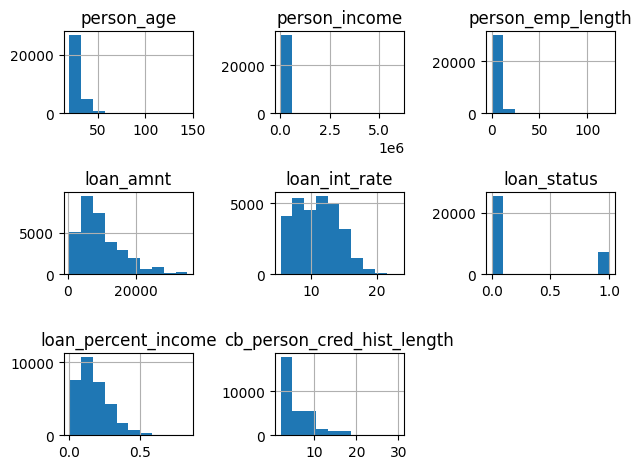

In [ ]:
plt.figure(figsize=(15,10))
df.hist()
plt.tight_layout()
plt.show()


### Average Loan Amount by Home Ownership


In [ ]:
loan_based_on_home_ownership=df.groupby('person_home_ownership')['loan_amnt'].mean().sort_values(ascending=False)


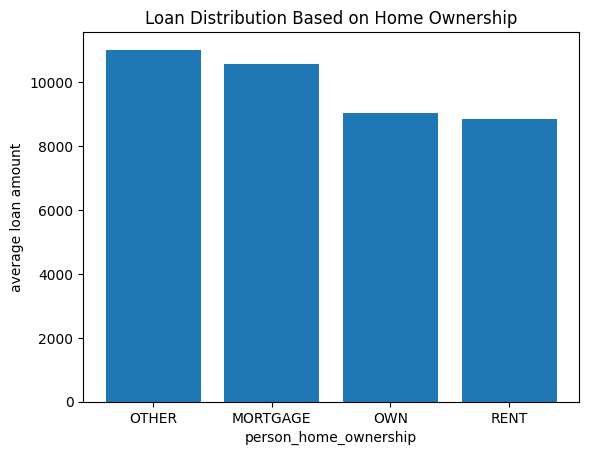

In [ ]:
plt.bar(loan_based_on_home_ownership.index,loan_based_on_home_ownership.values)
plt.xlabel('person_home_ownership')
plt.ylabel('average loan amount')
plt.title('Loan Distribution Based on Home Ownership')
plt.show()


- Mortgage and Other home ownership categories show higher average loan amounts.




### Percentage Distribution of Loan Amount by Home Ownership


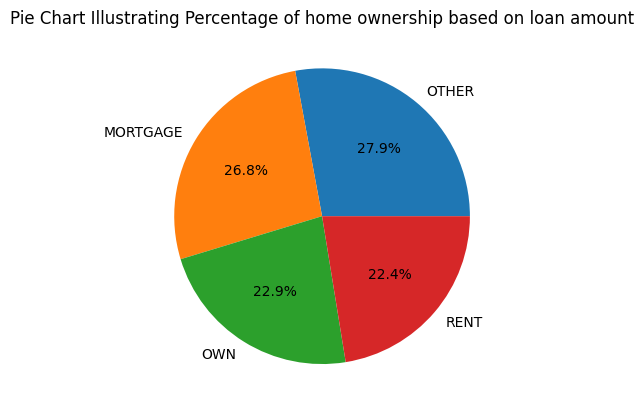

In [ ]:
plt.pie(loan_based_on_home_ownership,autopct='%1.1f%%',labels=loan_based_on_home_ownership.index)
plt.title('Pie Chart Illustrating Percentage of home ownership based on loan amount')
plt.show()

- Loan amounts are fairly distributed across home ownership categories, with Other and Mortgage forming the largest shares.


### Average Income by Home Ownership and Default Status



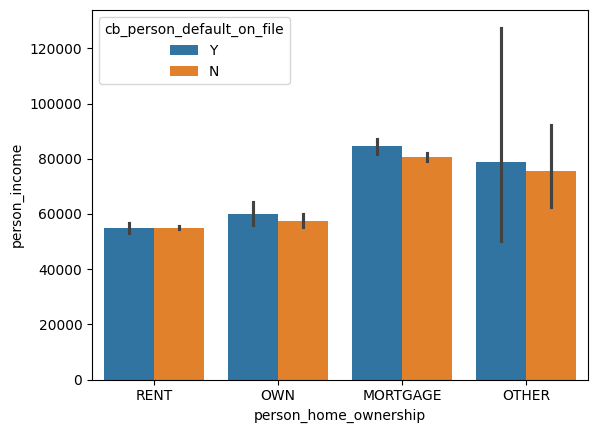

In [ ]:
sns.barplot(y='person_income',x='person_home_ownership',data=df,hue='cb_person_default_on_file')
plt.show()

- Applicants with Mortgage ownership have higher average income.
- Defaulters and non-defaulters show similar income patterns across ownership types.


### Pairwise Relationships Between Key Numerical Features


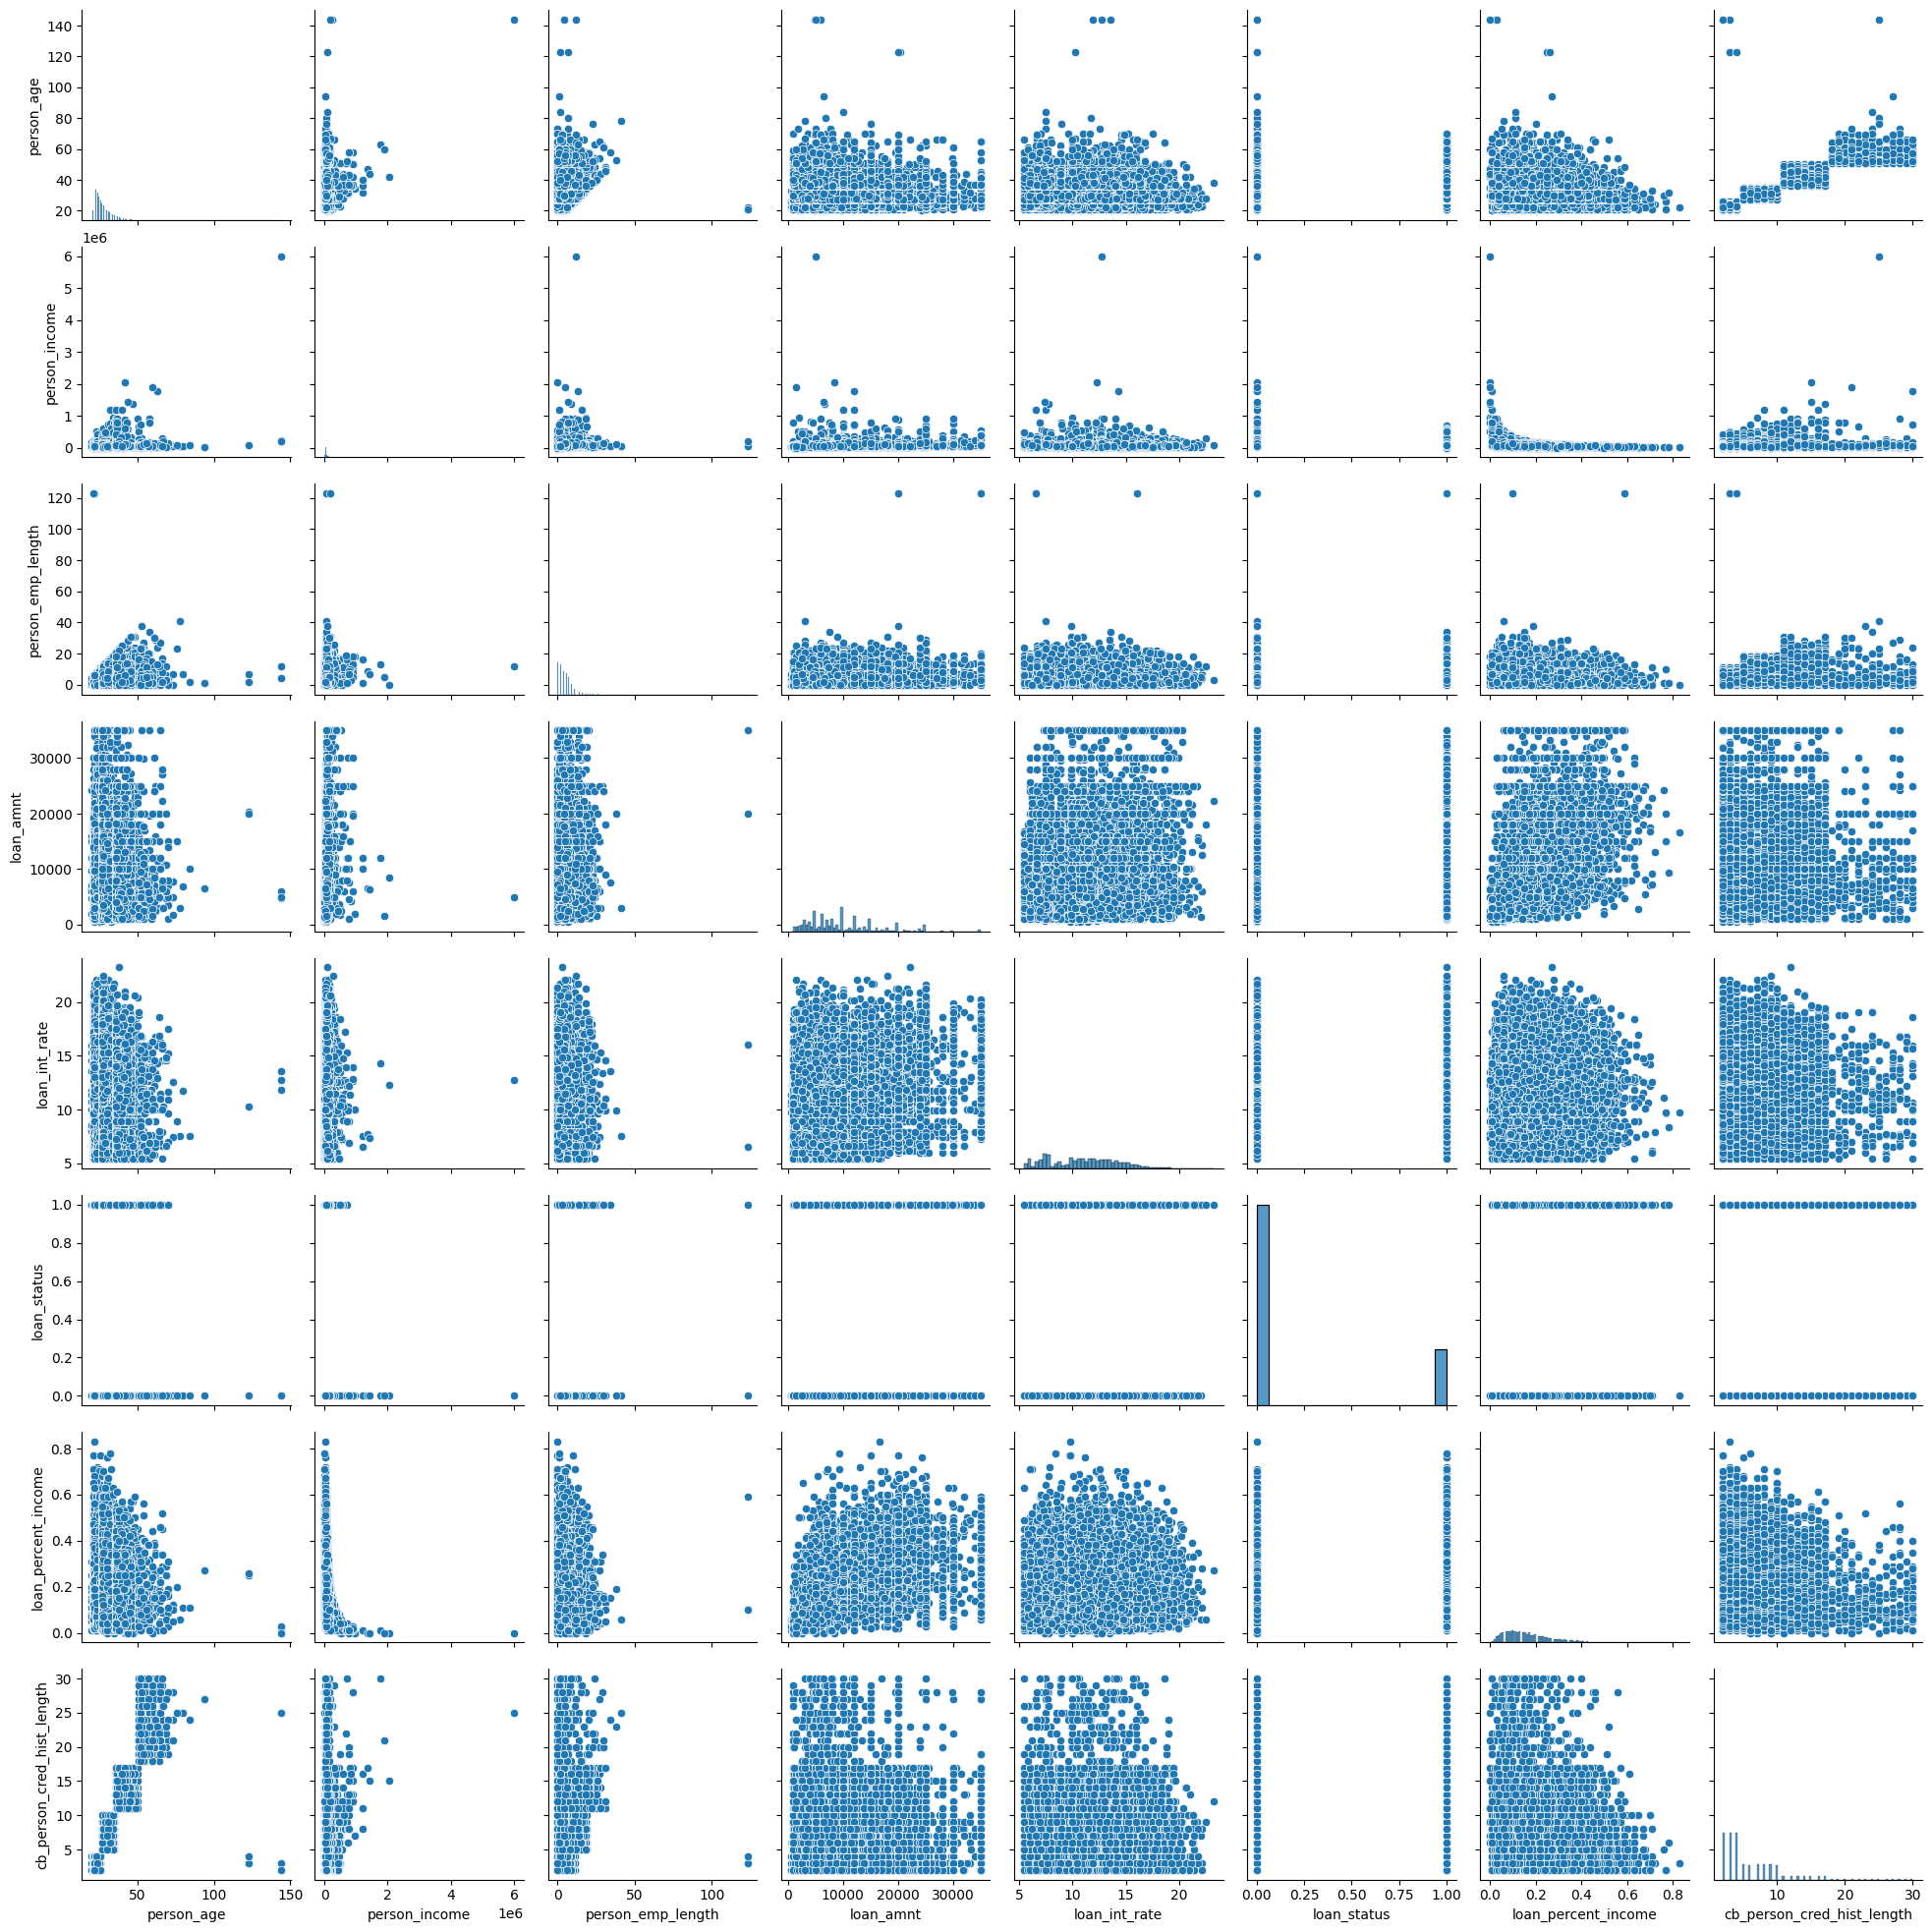

In [ ]:
sns.pairplot(df)
plt.show()

- Numerical features show weak linear relationships.


### Employment Length by Home Ownership and Default Status


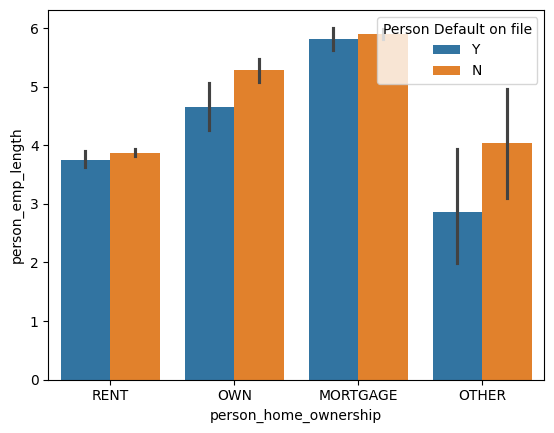

In [ ]:
sns.barplot(x='person_home_ownership',y='person_emp_length',hue='cb_person_default_on_file',data=df)
plt.legend(title='Person Default on file',loc='upper right')
plt.show()

- Mortgage holders generally have longer employment histories.
- Applicants who default tend to have slightly lower employment length.


### Box Plots for Identifying Outliers in Numerical Features


In [ ]:
col_names=df.select_dtypes(include='number').columns

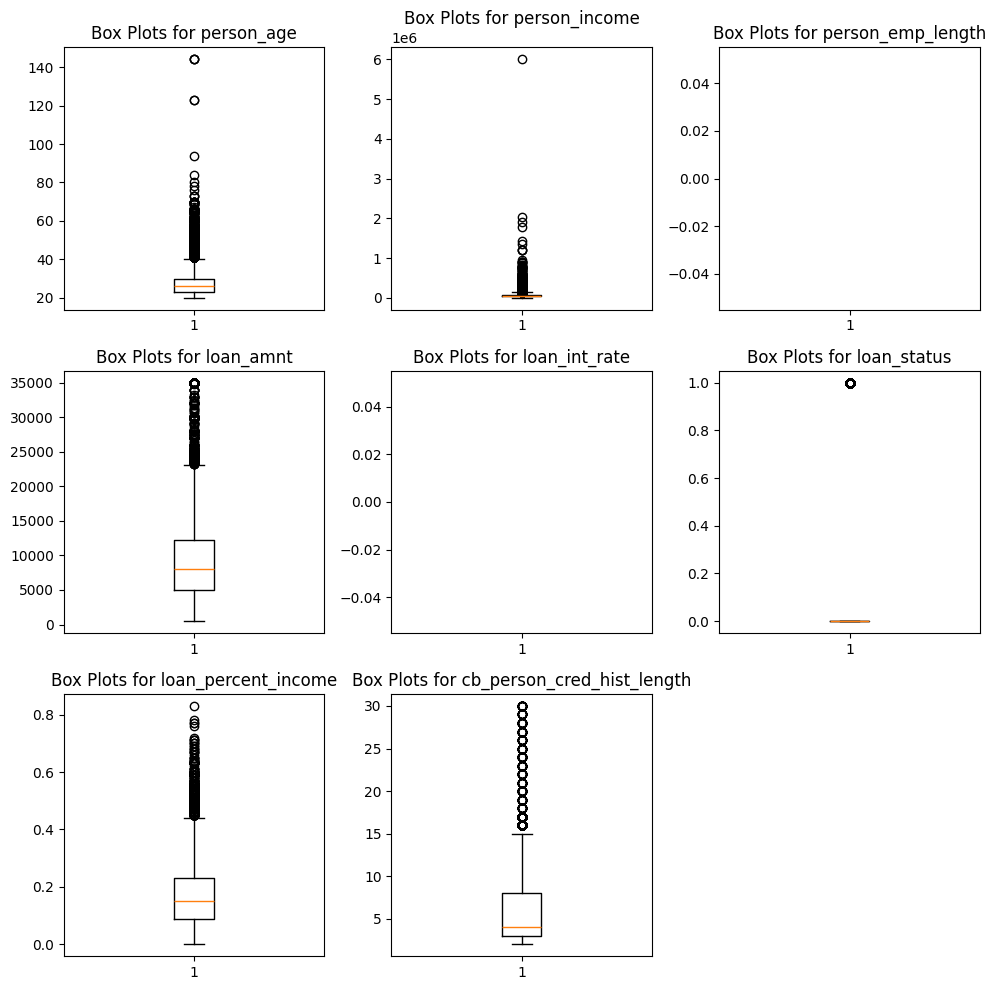

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(10,10))
ax=ax.flatten()
for i, col in enumerate(col_names):
  if i<len(ax):
    ax[i].boxplot(df[col])
    ax[i].set_title(f'Box Plots for {col}')
for i in range(len(col_names),len(ax)):
  fig.delaxes(ax[i])
plt.tight_layout()
plt.show()

- Several numerical features contain outliers.
- Outliers are retained as they may represent genuine high-risk cases.


## Feature Engineering

Feature engineering techniques are applied to transform categorical variables and improve the predictive power of the dataset.



In [ ]:
default_level={'Y':1,'N':0}
df['cb_person_default_on_file']=df['cb_person_default_on_file'].map(default_level)

In [ ]:
risk_level={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}
df['loan_grade']=df['loan_grade'].map(risk_level)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32416 entries, 0 to 32415
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  int64  
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  int64  
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 3.0+ MB


## Train-Test Split

The dataset was divided into training and testing sets to evaluate model performance on unseen data.

- 80% of the data was used for training.
- 20% was reserved for testing.

To address class imbalance, **stratified splitting** was used to ensure both the training and testing sets maintain similar class distributions.

This prevents bias caused by uneven sampling of the minority class.


In [ ]:
x=df.drop('cb_person_default_on_file',axis=1)
y=df['cb_person_default_on_file']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45,stratify=y)

## Handling Class Imbalance

The dataset is imbalanced, with significantly fewer default cases compared to non-default cases.

To account for this during model training:

- Class distribution was calculated using the training set only (to avoid data leakage).
- `scale_pos_weight` was computed as the ratio of majority to minority class.
- This value was later used in the XGBoost model to assign higher penalty to misclassified minority samples.

This helps improve recall for the default class.

In [ ]:
neg,pos=y_train.value_counts()
scale=neg/pos

## Preprocessing Pipeline

To avoid data leakage and ensure deployment safety, preprocessing was structured using Scikit-learn Pipelines.

### Numeric Features
- Missing values handled using Median Imputation.
- StandardScaler applied for consistent scaling across features.

Median was chosen as it is robust to outliers.

### Categorical Features
- Missing values handled using Most Frequent strategy.
- OneHotEncoding applied to avoid artificial ordinal relationships.
- `handle_unknown='ignore'` added for safe deployment.

All preprocessing was combined using `ColumnTransformer`.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
num_pipeline = Pipeline(
     [
         ('Imputer', SimpleImputer(strategy='median')),
         ('StandardScaler', StandardScaler())
     ]
 )

In [ ]:
cat_pipeline=Pipeline(
    [
        ('Imputer',SimpleImputer(strategy='most_frequent')),
        ('Encoder',OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [ ]:
num_col = x_train.select_dtypes(include='number').columns
cat_col = x_train.select_dtypes(include='object').columns

preprocess=ColumnTransformer(
    [
        ('num',num_pipeline,num_col),
        ('cat',cat_pipeline,cat_col)
    ]
)

preprocess.fit(x_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('StandardScaler',
                                                  StandardScaler())]),
                                 Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['person_home_ownership', 'loan_intent'], dtype='object'))])

In [ ]:
x_train_processed=preprocess.transform(x_train)

In [ ]:
print(x_train_processed.shape)

(25932, 19)


## Model Training

Three models were evaluated:

1. Logistic Regression (baseline)
2. Random Forest
3. XGBoost



In [ ]:
from sklearn.linear_model import LogisticRegression

lr_pipeline=Pipeline(
    [
        ('preprocess',preprocess),
        ('Classifier',LogisticRegression(class_weight='balanced'))
    ]
)
lr_pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('StandardScaler',
                                                                   StandardScaler())]),
                                                  Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['person_home_ownership', 'loan_intent'], dtype='object'))])),
                ('Classifier', LogisticRegression(class_weight='balanced'))])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_pipeline=Pipeline(
    [
        ('preprocess',preprocess),
        ('classifier',RandomForestClassifier(n_estimators=200,class_weight='balanced'))
    ]
)
rf_pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('StandardScaler',
                                                                   StandardScaler())]),
                                                  Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['person_home_ownership', 'loan_intent'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200))])

In [ ]:
from xgboost import XGBClassifier
xgb_pipeline=Pipeline(
    [
        ('preprocess',preprocess),
        ('classifier',XGBClassifier(eval_metrics='logloss',scale_pos_weight=scale,random_state=45))
    ]
)
xgb_pipeline.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [17:18:47] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "eval_metrics" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('StandardScaler',
                                                                   StandardScaler())]),
                                                  Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')),
                                                 ('...
                               eval_metrics='logloss', feature_types=None,
                               feature_weights=None, gamma=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None, ...))])

## Model Evaluation

To evaluate model performance, the following metrics were used:

- **Accuracy** – Overall correctness of the model.
- **Precision** – Proportion of correctly predicted positives.
- **Recall** – Ability to correctly identify defaulters.
- **F1-Score** – Harmonic mean of precision and recall.
- **ROC-AUC Score** – Measures the model’s ability to distinguish between classes.

Since the dataset is imbalanced, greater emphasis was placed on:
- **Recall (for default class)**
- **ROC-AUC Score**

Accuracy alone can be misleading in imbalanced datasets.

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,classification_report
import matplotlib.pyplot as plt

def evaluate(model,name,ax_obj):
  y_pred=model.predict(x_test)
  y_pred_proba=model.predict_proba(x_test)[:,1]
  print(f'Classification report for {name} \n',classification_report(y_test,y_pred))
  print(f'Accuracy score for {name} \n',accuracy_score(y_test,y_pred))
  print(f'ROC score for {name} \n',roc_auc_score(y_test,y_pred_proba))
  print('-'*40)
  fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
  ax_obj.plot(fpr,tpr,label=f'AUC curve for {name}')
  ax_obj.plot([0,1],[0,1],linestyle='--')
  ax_obj.set_xlabel(f'False Positive Rate')
  ax_obj.set_ylabel(f'True Positive Rate')
  ax_obj.set_title(f'ROC curve for {name}')
  ax_obj.legend(loc='lower right')

## ROC Curve Analysis

The ROC (Receiver Operating Characteristic) curve visualizes the trade-off between:

- **True Positive Rate (Recall)**
- **False Positive Rate**

The Area Under the Curve (AUC) represents the model’s ability to separate defaulters from non-defaulters.

A higher AUC indicates stronger discrimination capability.

Classification report for Logistic Regression 
               precision    recall  f1-score   support

           0       0.99      0.79      0.88      5338
           1       0.50      0.97      0.66      1146

    accuracy                           0.82      6484
   macro avg       0.75      0.88      0.77      6484
weighted avg       0.90      0.82      0.84      6484

Accuracy score for Logistic Regression 
 0.8231030228254164
ROC score for Logistic Regression 
 0.8934136982234786
----------------------------------------
Classification report for Random Forest Model 
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      5338
           1       0.51      0.42      0.46      1146

    accuracy                           0.83      6484
   macro avg       0.69      0.67      0.68      6484
weighted avg       0.81      0.83      0.82      6484

Accuracy score for Random Forest Model 
 0.8258790869833437
ROC score for Random Forest Model 

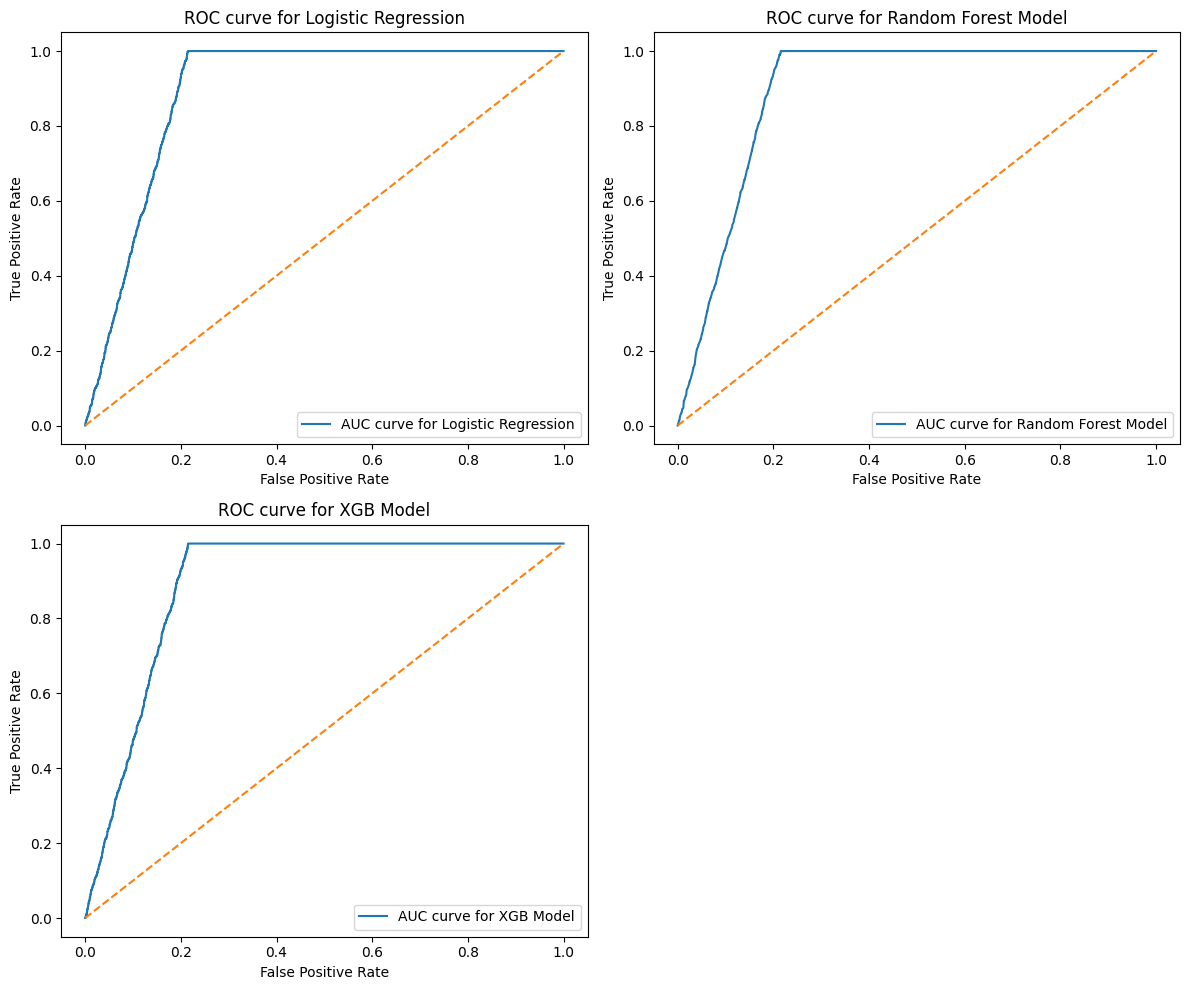

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(12,10))
ax = ax.flatten()
models_to_evaluate=[(lr_pipeline,'Logistic Regression'),(rf_pipeline,'Random Forest Model'),(xgb_pipeline,'XGB Model')]
for i,(model,name) in enumerate(models_to_evaluate):
  if i < len(ax):
    evaluate(model,name,ax[i])
for i in range(len(models_to_evaluate),len(ax)):
    fig.delaxes(ax[i])
plt.tight_layout()
plt.show()

## Model Comparison Summary

### Logistic Regression
- Baseline linear model.
- Lower overall ROC-AUC.
- Lower precision for minority class.

### Random Forest
- High accuracy.
- Strong precision.
- Slightly lower recall for defaulters.

### XGBoost
- Highest ROC-AUC score.
- Better balance between precision and recall.
- Strong performance on minority class.

Based on these results, **XGBoost was selected as the final model** for deployment.

## Feature Importance Analysis

To understand which variables most influence default prediction, feature importances were extracted from the trained XGBoost model.

Since preprocessing was performed using a Scikit-learn Pipeline with OneHotEncoding, transformed feature names were retrieved using:

- `get_feature_names_out()` for accurate mapping
- `feature_importances_` from the trained classifier

The top 10 most important features were then visualized.

This analysis helps interpret model behavior and identify key risk indicators.

In [ ]:
featiures_names=xgb_pipeline.named_steps['preprocess'].get_feature_names_out()
important_features=xgb_pipeline.named_steps['classifier'].feature_importances_

In [ ]:
features_df=pd.DataFrame({'features':featiures_names,'importances':important_features})

In [ ]:
top_10_imp=features_df.sort_values(by='importances',ascending=False).head(10)

<Axes: xlabel='importances', ylabel='features'>

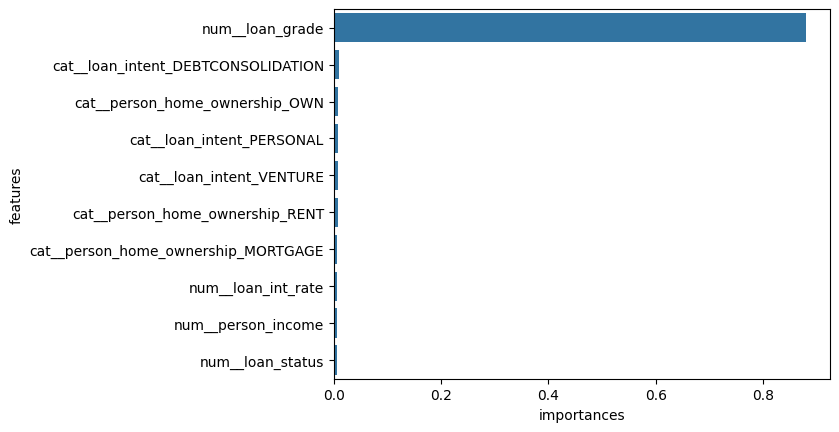

In [ ]:
sns.barplot(top_10_imp,x='importances',y='features')

## Interpretation of Results

From the feature importance analysis, the most influential predictors include:

- **Loan Grade**
- **Loan Percent Income**
- **Home Ownership Status (RENT/OWN)**
- **Loan Intent Categories**
- **Person Income**

### Business Insight

- Higher loan grades (risk categories) significantly impact default probability.
- A higher loan-to-income ratio increases financial burden, raising default risk.
- Renters may exhibit different risk profiles compared to homeowners.
- Loan purpose also influences repayment behavior.

Understanding these drivers improves transparency and supports risk-based lending decisions.

## Hyperparameter Tuning

GridSearchCV was applied to optimize the XGBoost model.

The following parameters were tuned:
- max_depth
- learning_rate
- n_estimators

ROC-AUC was used as the scoring metric with 3-fold cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV
params=[{'classifier__max_depth':[3,5],'classifier__learning_rate':[0.05,0.1],'classifier__n_estimators':[100,200]}]

In [ ]:
grid_model=GridSearchCV(xgb_pipeline,cv=3,scoring='roc_auc',param_grid=params,n_jobs=-1,verbose=1)

In [ ]:
grid_model.fit(x_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [17:19:00] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "eval_metrics" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('StandardScaler',
                                                                                          StandardScaler())]),
                                                                         Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None, ...))]),
             n_jobs=-1,
             param_grid=[{'classifier__learning_rate': [0.05, 0.1],
                          'classifier__max_depth': [3, 5],
                          'classifier__n_estimators': [100, 200]}],
             scoring='roc_auc', verbose=1)

In [ ]:
best_model=grid_model.best_estimator_

In [ ]:
  y_pred_bm=best_model.predict(x_test)
  y_pred_proba_bm=best_model.predict_proba(x_test)[:,1]
  print(f'Classification report for {name} \n',classification_report(y_test,y_pred_bm))
  print(f'Accuracy score for {name} \n',accuracy_score(y_test,y_pred_bm))
  print(f'ROC score for {name} \n',roc_auc_score(y_test,y_pred_proba_bm))

Classification report for XGB Model 
               precision    recall  f1-score   support

           0       1.00      0.78      0.88      5338
           1       0.50      1.00      0.67      1146

    accuracy                           0.82      6484
   macro avg       0.75      0.89      0.77      6484
weighted avg       0.91      0.82      0.84      6484

Accuracy score for XGB Model 
 0.8229487970388649
ROC score for XGB Model 
 0.893941704804108


## Tuned Model Results

The tuned XGBoost model achieved similar performance to the base model, with strong ROC-AUC (~0.95) and balanced precision and recall.

Since improvements were marginal, the base XGBoost model was retained for deployment.

## Final Model Selection

After evaluating multiple models including Logistic Regression, Random Forest, and XGBoost, XGBoost was selected as the final model.

Hyperparameter tuning was performed using GridSearchCV. However, the tuned model showed only a marginal improvement in ROC-AUC and slightly lower precision and recall compared to the base model.

Since the base XGBoost model provided:

- Higher accuracy  
- Better precision for defaulters  
- Better recall balance  
- Strong ROC-AUC (~0.95)  

The base XGBoost pipeline was selected as the final model for deployment.

## Deployment Readiness

The preprocessing and modeling steps were combined using a Scikit-learn Pipeline to prevent data leakage and ensure reproducibility.

The final model was saved using `joblib`, making it ready for deployment in a Streamlit application for real-time credit risk prediction.

In [ ]:
import joblib
joblib.dump(xgb_pipeline, "credit_risk_model.pkl")

['credit_risk_model.pkl']

In [ ]:
from google.colab import files
files.download("credit_risk_model.pkl")